In [1]:
import torch as t
from torch import nn

In [2]:
class Linear(nn.Module):
    def __init__(self, in_featrues, out_features):
        super(Linear, self).__init__()
        self.w = nn.Parameter(t.randn(in_featrues, out_features))
        self.b = nn.Parameter(t.randn(out_features))
    def forward(self, x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)
    

In [3]:
layer = Linear(4, 3)
input = t.randn(2, 4, requires_grad=True)
out = layer(input)


In [4]:
out

tensor([[-3.1337, -0.0987,  0.0207],
        [ 0.4095,  1.7465,  1.4320]], grad_fn=<AddBackward0>)

In [5]:
for name, parameter in layer.named_parameters():
    print(name, parameter)

w Parameter containing:
tensor([[-0.1383,  1.1173, -1.5702],
        [ 0.0940,  0.0211, -1.1215],
        [ 0.4290, -0.0345,  2.2964],
        [ 1.0856,  0.7833, -0.9529]], requires_grad=True)
b Parameter containing:
tensor([-1.2551,  0.5721, -0.1768], requires_grad=True)


In [6]:
class Perception(nn.Module):
    def __init__(self, in_features, hidden_features, out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features, hidden_features)
        self.layer2  =Linear(hidden_features, out_features)
    
    def forward(self, x):
        x = self.layer1(x)
        x = torch.sigmoid(x)
        return self.layer2(x)

In [7]:
perception = Perception(3, 4, 1)

In [8]:
for name, parameters, in perception.named_parameters():
    print(name, parameters)

layer1.w Parameter containing:
tensor([[-1.5587, -0.8380, -0.6149, -0.8499],
        [ 1.5878,  0.5371,  0.2343,  0.9775],
        [-2.1931, -0.2343, -0.2859,  0.4248]], requires_grad=True)
layer1.b Parameter containing:
tensor([-0.3418,  0.4806,  0.9675,  0.0723], requires_grad=True)
layer2.w Parameter containing:
tensor([[0.8200],
        [0.6258],
        [0.2196],
        [0.8684]], requires_grad=True)
layer2.b Parameter containing:
tensor([0.8916], requires_grad=True)


In [9]:
nn.layer?


Object `nn.layer` not found.


In [10]:
from PIL import Image

In [11]:
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor()
to_pil = ToPILImage()
lena = Image.open('lena.png')

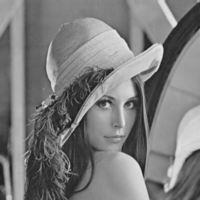

In [12]:
lena

In [13]:
input = to_tensor(lena).unsqueeze(0)

In [14]:
kernel = t.ones(3, 3) /-3

In [15]:
kernel[1][1]

tensor(-0.3333)

In [16]:
conv = nn.Conv2d(1, 1, (3, 3), 1, bias=False)
conv.weight.data = kernel.view(1, 1,3, 3)
out = conv(input)

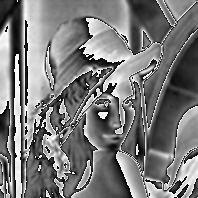

In [17]:
to_pil(out.data.squeeze(0))

In [18]:
out.shape

torch.Size([1, 1, 198, 198])

In [19]:
out.data.shape

torch.Size([1, 1, 198, 198])

In [20]:
out.data.squeeze(0).shape

torch.Size([1, 198, 198])

In [21]:
pool = nn.AvgPool2d(2, 2)
list(pool.parameters())


[]

In [22]:
out = pool(input)

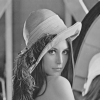

In [23]:
to_pil(out.data.squeeze(0))

In [24]:
out.shape

torch.Size([1, 1, 100, 100])

In [25]:
input = t.randn(2, 3)
linear = nn.Linear(3, 4)
h = linear(input)
h

tensor([[ 0.4995,  0.1846, -0.4050, -0.6646],
        [ 0.6215, -0.8696, -0.8638,  0.1563]], grad_fn=<AddmmBackward>)

In [26]:
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4)*4
bn.bias.data = t.zeros(4)

In [27]:
bn_out = bn(h)
bn_out.mean(0), bn_out.var(0, unbiased=False)

(tensor([-9.5367e-07,  0.0000e+00,  3.5763e-07,  0.0000e+00],
        grad_fn=<MeanBackward0>),
 tensor([15.9572, 15.9994, 15.9970, 15.9991], grad_fn=<VarBackward1>))

In [28]:
bn_out

tensor([[-3.9946,  3.9999,  3.9996, -3.9999],
        [ 3.9946, -3.9999, -3.9996,  3.9999]],
       grad_fn=<NativeBatchNormBackward>)

In [29]:
drop = nn.Dropout(0.5)

In [30]:
o = drop(bn_out)

In [31]:
o

tensor([[-0.0000,  0.0000,  7.9992, -0.0000],
        [ 7.9893, -0.0000, -7.9992,  7.9998]], grad_fn=<MulBackward0>)

In [32]:
relu = nn.ReLU(inplace = True)

In [33]:
input = t.randn(2, 3)
input

tensor([[-0.1001,  1.9951, -0.5163],
        [-0.0641,  1.4097, -1.9845]])

In [34]:
output = relu(input)

In [35]:
output

tensor([[0.0000, 1.9951, 0.0000],
        [0.0000, 1.4097, 0.0000]])

In [36]:
net1 = nn.Sequential()
net1.add_module('conv', nn.Conv2d(3, 3,3))
net1.add_module('batchnorm', nn.BatchNorm2d(3))
net1.add_module('activation_layer', nn.ReLU())


In [37]:
net2 = nn.Sequential(
    nn.Conv2d(3, 3, 3),
    nn.BatchNorm2d(3), 
    nn.ReLU()
    )

In [38]:
from collections import OrderedDict

In [39]:
net3 = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(3,3,3)), 
    ('bn1', nn.BatchNorm2d(3)), 
    ('relu1', nn.ReLU())
]))

In [40]:
net1

Sequential(
  (conv): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (batchnorm): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (activation_layer): ReLU()
)

In [41]:
net2

Sequential(
  (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
)

In [42]:
net3

Sequential(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
)

In [43]:
net1.conv

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))

## 

In [44]:
net2[0]

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))

In [45]:
input = t.rand(1, 3, 4 ,4)

In [46]:
input

tensor([[[[0.8466, 0.4259, 0.4223, 0.7719],
          [0.7844, 0.7037, 0.4661, 0.9636],
          [0.0028, 0.1514, 0.3242, 0.1194],
          [0.4456, 0.6353, 0.0204, 0.0493]],

         [[0.0325, 0.2471, 0.0222, 0.8240],
          [0.2155, 0.0137, 0.1876, 0.7653],
          [0.5741, 0.9395, 0.6724, 0.3478],
          [0.1075, 0.1177, 0.2845, 0.3862]],

         [[0.9889, 0.8165, 0.2774, 0.0747],
          [0.7278, 0.4450, 0.5754, 0.8353],
          [0.9157, 0.6131, 0.7852, 0.6482],
          [0.4745, 0.6811, 0.1603, 0.1185]]]])

In [47]:
output = net1(input)

In [48]:
output

tensor([[[[0.0000, 0.4016],
          [0.4957, 0.0000]],

         [[0.0000, 0.1807],
          [1.1732, 0.0000]],

         [[0.0000, 1.5161],
          [0.0000, 0.0000]]]], grad_fn=<ThresholdBackward0>)

In [49]:
output = net2(input)
output

tensor([[[[0.0358, 0.0000],
          [0.4078, 0.0000]],

         [[0.8070, 0.9495],
          [0.0000, 0.0000]],

         [[0.0000, 0.0092],
          [0.5889, 0.0000]]]], grad_fn=<ThresholdBackward0>)

In [50]:
input = t.randn(2, 3,4)
input
# batch size = 3, length = 2, each is 4 d


tensor([[[ 0.3811, -0.9968,  0.3929,  1.9898],
         [ 1.0102,  0.9403, -0.6332,  1.3293],
         [-0.1155,  0.1001, -0.0213, -1.2573]],

        [[-0.7420,  1.1143,  0.7762,  0.3410],
         [ 0.9968,  0.1576, -0.8823, -0.5914],
         [ 0.1082,  0.0503,  0.1900,  0.3838]]])

In [51]:
# 4-d, 3 hidden, 1layer
lstm = nn.LSTM(4, 3, 1)


In [52]:
# 1 layer, batchsize = 3, 3 hidden
h0 = t.randn(1, 3, 3)

In [53]:
h0

tensor([[[ 0.1407, -0.2937, -1.5854],
         [-2.1129, -0.9965, -1.0237],
         [-1.9678,  0.4552,  0.2799]]])

In [54]:
c0 = t.randn(1, 3 ,3)

In [55]:
c0

tensor([[[-1.0225,  0.0986,  0.5525],
         [ 1.1133,  0.5294,  1.0090],
         [ 0.1661,  0.4357,  0.2497]]])

In [56]:
out , (h1, c1) = lstm(input, (h0, c0))

In [57]:
out

tensor([[[-0.0243, -0.0942,  0.0890],
         [ 0.5618,  0.0025,  0.2088],
         [ 0.1962,  0.1132,  0.1331]],

        [[ 0.1526,  0.1258, -0.1072],
         [ 0.3087,  0.1914,  0.3343],
         [ 0.1642,  0.3151,  0.0523]]], grad_fn=<StackBackward>)

In [58]:
h1

tensor([[[ 0.1526,  0.1258, -0.1072],
         [ 0.3087,  0.1914,  0.3343],
         [ 0.1642,  0.3151,  0.0523]]], grad_fn=<StackBackward>)

In [59]:
c1

tensor([[[ 0.2220,  0.1670, -0.2948],
         [ 0.8657,  0.5490,  0.5907],
         [ 0.3065,  0.5792,  0.1039]]], grad_fn=<StackBackward>)

In [60]:
input.shape

torch.Size([2, 3, 4])

In [61]:
input = t.randn(2, 3,4)

In [62]:
lstm = nn.LSTMCell(4, 3)
hx = t.randn(3, 3)
cx = t.randn(3, 3)
# each lstm cell is one layer

In [63]:
out = []
for i_ in input:
    hx, cx = lstm(i_, (hx, cx))
    out.append(hx)
t.stack(out)

tensor([[[-0.0849, -0.2903,  0.5946],
         [ 0.3299,  0.0098,  0.3750],
         [ 0.0648, -0.2693, -0.1239]],

        [[-0.1580, -0.2770,  0.5606],
         [ 0.1304, -0.3956,  0.1549],
         [ 0.1890, -0.1501,  0.2350]]], grad_fn=<StackBackward>)

In [64]:
out

[tensor([[-0.0849, -0.2903,  0.5946],
         [ 0.3299,  0.0098,  0.3750],
         [ 0.0648, -0.2693, -0.1239]], grad_fn=<MulBackward0>),
 tensor([[-0.1580, -0.2770,  0.5606],
         [ 0.1304, -0.3956,  0.1549],
         [ 0.1890, -0.1501,  0.2350]], grad_fn=<MulBackward0>)]

In [65]:
embedding = nn.Embedding(4, 5)

In [66]:
embedding

Embedding(4, 5)

In [67]:
embedding.weight.data = t.arange(0, 20).view(4, 5)

In [68]:
embedding

Embedding(4, 5)

In [69]:
embedding.weight

Parameter containing:
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]], requires_grad=True)

In [70]:
input  = t.arange(3, 0, -1).long()

In [71]:
input

tensor([3, 2, 1])

In [72]:
input.type()

'torch.LongTensor'

In [73]:
output = embedding(input)

In [74]:
label = t.Tensor([1, 0, 1]).long()

In [75]:
label

tensor([1, 0, 1])

In [76]:
score = t.randn(3, 2)

In [77]:
criterion = nn.CrossEntropyLoss()

In [78]:
loss = criterion(score, label)

In [79]:
loss

tensor(0.8298)

In [80]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(), 
            nn.Linear(120, 84), 
            nn.ReLU(),
            nn.Linear(84, 10)
            )
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16*5*5)
        x = self.classifier(x)
        return x
net = Net()

In [81]:
net

Net(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [82]:
from torch import optim

In [83]:
optimizer = optim.SGD(params=net.parameters(), lr =1)
optimizer.zero_grad()
input = t.randn(1, 3, 32, 32)
output = net(input)
output.backward(output)

In [84]:
output

tensor([[ 0.0048,  0.1524, -0.1453,  0.0770,  0.0025, -0.1526,  0.0576, -0.0514,
          0.0908, -0.0604]], grad_fn=<AddmmBackward>)

In [85]:
# set lr
optimizer = optim.SGD([
    {'params':net.features.parameters()},
    {'params':net.classifier.parameters(), 'lr':1e-2}
], lr=1e-5)

In [86]:
# only set up larger lr for two dense layer
special_layer = nn.ModuleList([net.classifier[0], net.classifier[3]])
special_layer_params = list(map(id, special_layer.parameters()))
base_params = filter(lambda p:id(p) not in special_layer_params, net.parameters())

In [87]:
optimizer = t.optim.SGD([
    {'params':base_params}, 
    {'params':special_layer.parameters(), 'lr':0.01}
], lr=0.001)

In [88]:
optimizer.zero_grad()
input = t.randn(1, 3, 32, 32)
output = net(input)
output.backward(output)

In [89]:
output

tensor([[ 0.0060,  0.1717, -0.1464,  0.0914, -0.0212, -0.1288,  0.0633, -0.0515,
          0.1287, -0.0533]], grad_fn=<AddmmBackward>)

In [90]:
# nn.functional

In [91]:
input = t.randn(2, 3)
model = nn.Linear(3, 4)
output1 = model(input)
output2 = nn.functional.linear(input, model.weight, model.bias)
output1 == output2

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)

In [92]:
output1 == output2

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=torch.uint8)

In [93]:
b  = nn.functional.relu(input)
b2 = nn.ReLU()(input)
b == b2

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.uint8)

In [94]:
# 注意一下functional和module
from torch.nn import functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x ):
        x = F.pool(F.relu(self.conv1(x)),2)
        x = F.pool(F.relu(self.conv2(x)),2)
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        


In [96]:
# nn.init专门用于初始化
from torch.nn import init
linear = nn.Linear(3,4)
t.manual_seed(1)
# linear.wright.data.normal_(0, std)
init.xavier_normal_(linear.weight)

Parameter containing:
tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]], requires_grad=True)

In [98]:
import math
t.manual_seed(1)
std = math.sqrt(2)/math.sqrt(7.)
linear.weight.data.normal_(0, std)

tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]])

In [100]:
for name, params in net.named_parameters():
    if name.find('linear')!= -1:
        params[0]
        params[1]
    elif name.find('conv')!=-1:
        pass
    elif name.find('norm') != -1:
        pass

In [104]:
# build a resNet
from torch import nn 
import torch as t
from torch.nn import functional as F
class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride = 1, shortcut = None):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, 3, stride, 1, bias=False),
            nn.BatchNorm2d(outchannel),
            nn.ReLU(),
            nn.Conv2d(outchannel, outchannel, 3, 1, 1, bias = False),
            nn.BatchNorm2d(outchannel)
        )
        self.right = shortcut
    
    def forward(self, x):
        out = self.left(x)
        residual = x if self.right is None else self.right(x)
        out += residual
        return F.relu(out)
    

class ResNet(nn.Module):
#     resnet34
    def __init__(self, num_classes=1000):
        super(ResNet, self).__init__()
#         前几层
        self.pre = nn.Sequential(
            nn.Conv2d(3, 64, 7, 2, 3, bias = False),
            nn.BatchNorm2d(64), 
            nn.ReLU(inplace = True),
            nn.MaxPool2d(3, 2, 1)
            )
    
        self.layer1 = self._make_layer(64, 128, 3)
        self.layer2 = self._make_layer(128, 256, 4, stride=2)
        self.layer3 = self._make_layer(256, 512, 6, stride=2)
        self.layer4 = self._make_layer(512, 512, 3, stride = 2)
        
        self.fc = nn.Linear(512, num_classes)
    
    def _make_layer(self, inchannel, outchannel, block_num, stride=1):
        
        shortcut = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, 1, stride, bias=False), 
            nn.BatchNorm2d(outchannel))
        
        layers = []
        layers.append(ResidualBlock(inchannel, outchannel, stride, shortcut))
        
        for i in range(1, block_num):
            layers.append(ResidualBlock(outchannel, outchannel))
        
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.pre(x )
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = F.avg_pool2d(x, 7)
        x = x.view(x.size(0), -1)
        return self.fc(x)
    
        
        
        
        
    
    
    

    
    
    

In [105]:
model = ResNet()
print(model)

ResNet(
  (pre): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (right): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )

In [106]:
input = t.randn(1, 3, 224, 224)
o = model(input)

In [107]:
0

0

In [108]:
from torchvision import models
model = models.resnet34()

In [109]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [110]:
from torchvision import models
from torch import nn


In [112]:
resnet34 = models.resnet34(pretrained=True, num_classes=1000)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/ziyu/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:22<00:00, 3811337.01it/s]


In [113]:
resnet34.fc = nn.Linear(512, 10)

In [114]:
resnet34

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [116]:
# from torchvision import datasets
# dataset = datasets.MNIST('data/', download=True, train=False)

KeyboardInterrupt: 